## Dependencies

```
# 60.19/20
9f0fb6690089f72de7866333baeacd357580eddf  ../../data/shehui/shehui_phones_loglik.csv
9db096ce25c6f40c852a4fd467d0af2dec36598c  ../../data/shehui/shehui_feats.csv
```

In [1]:
phones_df_path = "../../data/shehui/shehui_phones_loglik.csv"
feats_df_path = "../../data/shehui/shehui_feats.csv"
!sha1sum $phones_df_path $feats_df_path

9f0fb6690089f72de7866333baeacd357580eddf  ../../data/shehui/shehui_phones_loglik.csv
9db096ce25c6f40c852a4fd467d0af2dec36598c  ../../data/shehui/shehui_feats.csv


## Load Data

In [2]:
import pandas as pd
WORD = "社會"
phones_df = pd.read_csv(phones_df_path)
feats_df = pd.read_csv(feats_df_path)

In [3]:
phones_df.head()

,utt_id,t,phone,ml_phone,sil,spn,a,aj,aw,o,...,ts,tsʰ,ɕ,z,z̩,s,ŋ,ŋ̍,ɻ,ʔ
0,XSH_GY_3144,0,s,s,-6.437794,-6.552097,-17.652924,-17.378895,-18.411922,-9.368706,...,-3.199192,-1.606560,-3.654819,-9.510803,-7.564896,-1.214210,-18.055984,-18.055984,-19.586933,-20.024937
1,XSH_GY_3144,1,s,ʂ,-5.519778,-7.003321,-19.554240,-20.674922,-21.033927,-12.286090,...,-2.849063,-2.363028,-2.935759,-14.332965,-12.387053,-1.087344,-23.334078,-23.334078,-25.574588,-23.519419
2,XSH_GY_3144,2,s,ʂ,-4.946358,-7.308338,-18.857937,-18.568791,-20.644375,-14.256306,...,-2.323124,-2.052910,-3.246426,-16.530224,-14.584313,-1.457420,-21.160301,-21.160301,-28.305134,-23.949268
3,XSH_GY_3144,3,s,tɕ,-3.245276,-7.227122,-19.971842,-18.145422,-19.264567,-13.222701,...,-1.730967,-2.791892,-3.191592,-14.730807,-12.784899,-1.482130,-21.578692,-21.578692,-25.913706,-25.956484
4,XSH_GY_3144,4,s,s,-4.678264,-8.654559,-21.031406,-20.628047,-19.168536,-16.025870,...,-5.370967,-3.841865,-1.933715,-14.845401,-12.899493,-0.430141,-23.806201,-23.806201,-26.990596,-25.433437


In [4]:
phone_table = phones_df.columns[4:].values
len(phone_table)

45

Text(0.5, 1.0, 'HSK_GY_0046 社會')

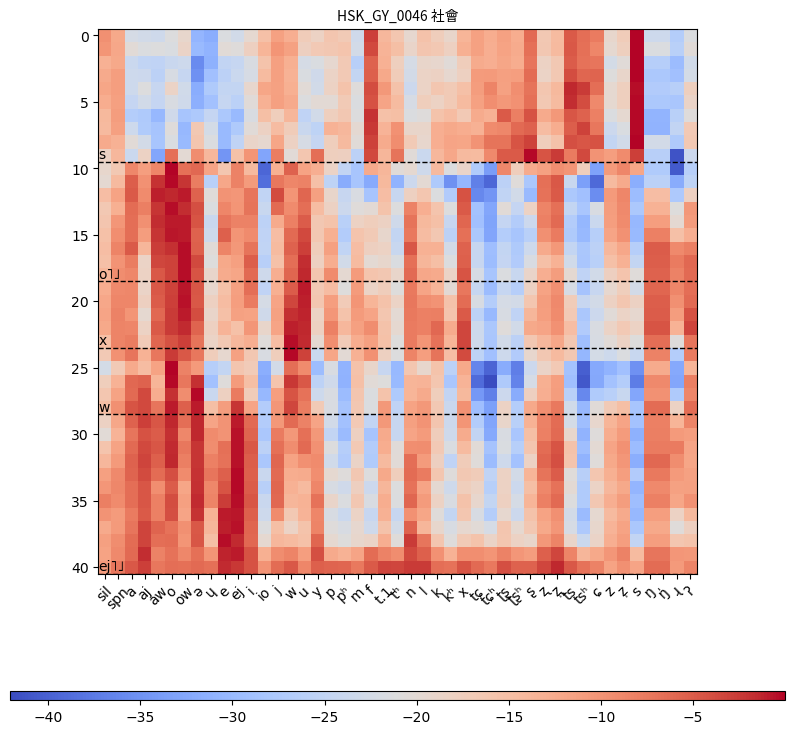

In [5]:
from typing import cast
import matplotlib.pyplot as plt

utt_id = phones_df.utt_id.unique()[12]
utt_df = phones_df.loc[phones_df["utt_id"] == utt_id, :]
pmat = utt_df.iloc[:, 4:].values

fig = plt.figure(figsize=(10, 10*(pmat.shape[0]/pmat.shape[1])+1))
plt.imshow(pmat, 
            cmap="coolwarm")

for phone, phone_grp in utt_df.groupby("phone", sort=False):
    t_end = phone_grp.iloc[-1].t
    phone = cast(str, phone)
    plt.text(-0.5, t_end+0.5, phone, va="bottom")
    plt.axhline(t_end+0.5, color="black", 
            linewidth=1, linestyle="dashed")

xticks = range(0, len(phone_table), 1)
xticklabels = [phone_table[y] for y in xticks]
plt.xticks(xticks, xticklabels, rotation=45) 
plt.colorbar(location="bottom", aspect=80)
plt.title(f"{utt_id} {WORD}", fontsize=20, font="Noto Sans CJK JP")
# fig.savefig(str(fig_dir/f"{utt_x.utt_id}_{word_x.label}.png"))


In [6]:
from IPython.display import Audio
from pathlib import Path
wav_dir = Path(f"../../data/shehui/shehui/s0/").expanduser()
Audio(wav_dir/f"{utt_id}.wav", rate=22050)

## Visualize MFCC

In [7]:
feats_df.head()

,utt_id,t,phone,ml_phone,0,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39
0,XSH_GY_3144,0,s,s,5.578886,-0.135650,-0.374280,3.352128,0.732764,-1.479430,...,-1.365733,0.257426,-1.101300,1.041242,-0.828530,-0.188513,-1.100204,-0.134666,-0.163632,-0.335212
1,XSH_GY_3144,1,s,ʂ,6.551662,-0.300453,-2.290173,3.640758,0.369964,-1.195133,...,-1.292275,0.675955,-0.932030,1.025257,-1.057766,-0.313714,-1.487456,-1.124908,-0.116412,-0.757999
2,XSH_GY_3144,2,s,ʂ,6.926285,-0.392983,-0.152725,3.906357,0.685167,-1.036523,...,0.449056,1.026398,-0.958148,-0.453097,-1.109381,-0.610119,-1.301814,-0.185548,-0.207318,-0.221535
3,XSH_GY_3144,3,s,tɕ,7.488463,-0.335616,0.030974,3.871045,1.881627,-1.092900,...,-0.076527,0.255296,-0.153059,-1.487230,-1.101921,0.022102,-0.219953,0.065688,0.095339,0.630594
4,XSH_GY_3144,4,s,s,7.995631,-0.030536,0.650714,4.070160,1.329532,-0.912432,...,-2.123919,-0.386399,0.654840,-0.573652,-0.939927,0.487315,-0.273641,0.327561,-0.712273,0.302426


In [8]:
from sklearnex.manifold import TSNE
base_feat_idx = feats_df.columns.values.tolist().index("ml_phone")+1
feats_mat = feats_df.iloc[:,base_feat_idx:]
tsne = TSNE(perplexity=50)
feats_proj = tsne.fit_transform(feats_mat)


/home/seantyh/miniconda3/envs/mfa/lib/python3.11/site-packages/daal4py/sklearn/manifold/_t_sne.py:361: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn("The PCA initialization in TSNE will change to "


Text(0, 0.5, 'tSNE-2')

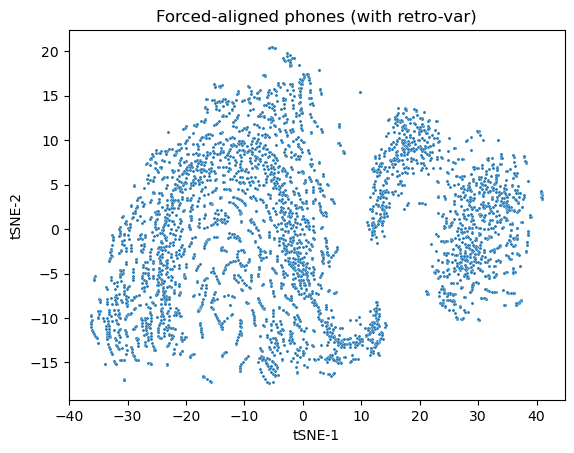

In [9]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0, 0.5, 'tSNE-2')

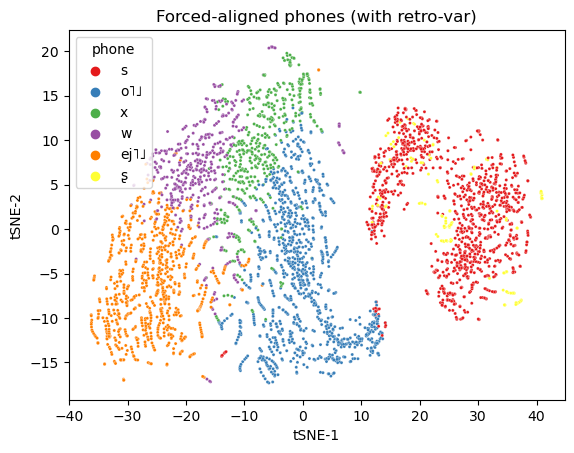

In [10]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], 
                hue=feats_df["phone"], palette="Set1",
                s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0.5, 0.9, 'max-logLik phones (with retro-var)')

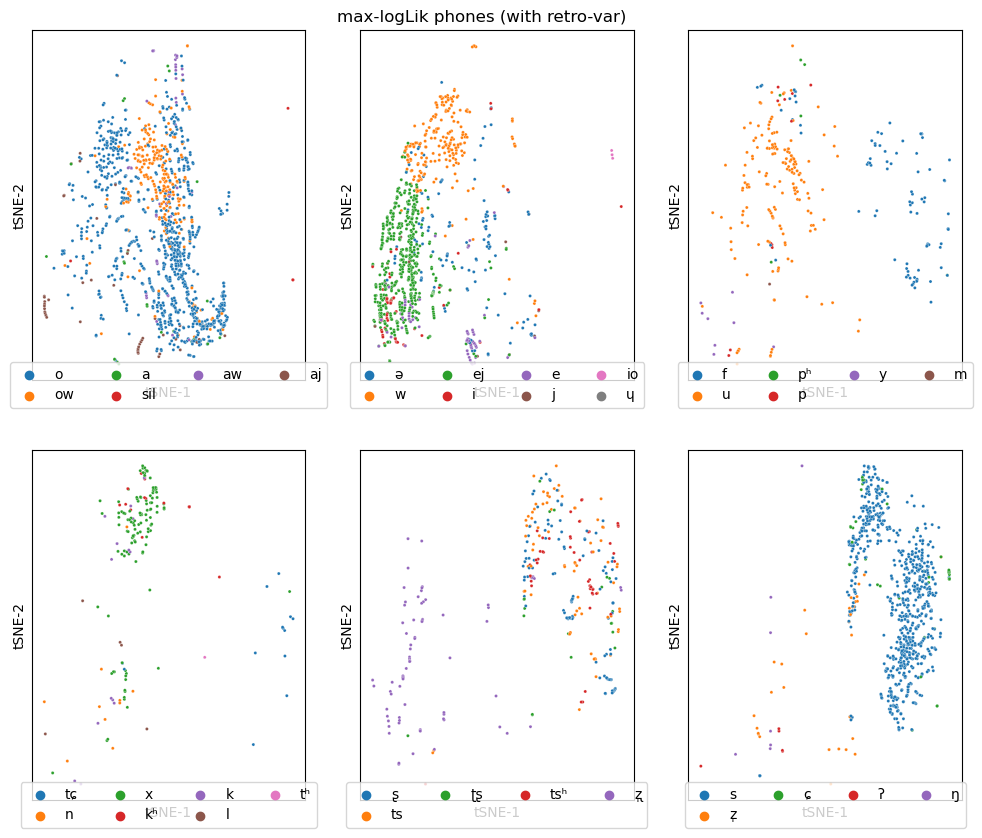

In [11]:
fig = plt.figure(figsize=(12, 10))
for ax_i in range(6):
    plt.subplot(2, 3, ax_i+1)
    sidx = ax_i*len(phone_table)//6
    eidx = (ax_i+1)*len(phone_table)//6
    subset_mask = feats_df["ml_phone"].isin(phone_table[sidx:eidx])
    sns.scatterplot(x=feats_proj[subset_mask,0], y=feats_proj[subset_mask,1], 
                    hue=feats_df["ml_phone"][subset_mask], palette="tab10",
                    s=5)
    plt.xlabel("tSNE-1")
    plt.ylabel("tSNE-2")
    plt.yticks([])
    plt.xticks([])
    plt.gca().legend(loc="lower center", ncols=4, bbox_to_anchor=(0.5, -0.1))
fig.suptitle("max-logLik phones (with retro-var)", y=.9)